In [92]:
import requests
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

## Data Preparation

In [93]:
df = pd.read_csv("iOS-DPAPP-20-21.csv") 
df.head()

,USER COMMENT,USER NAME,DATE,RATING
0,"Got fined twice on the same speed trap , and t...",snakesneakinga,"Mar 26, 2021",1
1,Go,pereranath,"Mar 19, 2021",1
2,There is dubai police app Then smart app The D...,srenevas,"Mar 13, 2021",1
3,"My name is SH Saeed Butti Al Maktoum, I send a...",by ay over,"Feb 9, 2021",1
4,I have not yet been able to receive the activa...,Billly2121,"Dec 28, 2020",1


In [94]:
df.drop(['USER COMMENT','USER NAME','DATE'], axis=1, inplace=True)
df.head()

,RATING
0,1
1,1
2,1
3,1
4,1


In [89]:
# Changing float numbers to integers
# iosreviews = df["RATING"].astype(int)
# df.head()

,RATING
0,1
1,1
2,1
3,1
4,1


In [95]:
df['RATING'].value_counts()

5    121
1     48
3      8
2      7
4      5
Name: RATING, dtype: int64

<AxesSubplot:ylabel='RATING'>

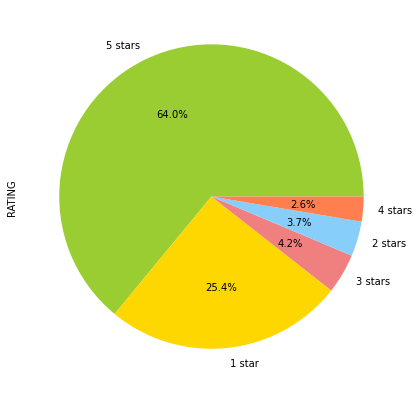

In [96]:
colors = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue','coral']
labels = '5 stars', '1 star', '3 stars','2 stars','4 stars'
df['RATING'].value_counts().plot.pie(figsize=(10, 7), colors=colors, labels=labels, autopct='%1.1f%%')

# Sentiment Analysis

In [192]:
ioscomments = pd.read_csv("iOS-DPAPP-20-21.csv") 
ioscomments.head()

,USER COMMENT,USER NAME,DATE,RATING
0,"Got fined twice on the same speed trap , and t...",snakesneakinga,"Mar 26, 2021",1
1,Go,pereranath,"Mar 19, 2021",1
2,There is dubai police app Then smart app The D...,srenevas,"Mar 13, 2021",1
3,"My name is SH Saeed Butti Al Maktoum, I send a...",by ay over,"Feb 9, 2021",1
4,I have not yet been able to receive the activa...,Billly2121,"Dec 28, 2020",1


In [193]:
ioscomments.drop(['USER NAME','DATE','RATING'], axis=1, inplace=True)
ioscomments.head()

,USER COMMENT
0,"Got fined twice on the same speed trap , and t..."
1,Go
2,There is dubai police app Then smart app The D...
3,"My name is SH Saeed Butti Al Maktoum, I send a..."
4,I have not yet been able to receive the activa...


In [194]:
ioscomments.rename(columns={'USER COMMENT':'reviews'}, inplace=True)
ioscomments.head()

,reviews
0,"Got fined twice on the same speed trap , and t..."
1,Go
2,There is dubai police app Then smart app The D...
3,"My name is SH Saeed Butti Al Maktoum, I send a..."
4,I have not yet been able to receive the activa...


In [195]:
ioscomments.to_csv(r'ios-reviews-2020.csv', index = False)

In [196]:
df = ioscomments
df.head()

,reviews
0,"Got fined twice on the same speed trap , and t..."
1,Go
2,There is dubai police app Then smart app The D...
3,"My name is SH Saeed Butti Al Maktoum, I send a..."
4,I have not yet been able to receive the activa...


## Analysis text processing

In [197]:
from bs4 import BeautifulSoup

In [198]:
len(df['reviews'])

189

In [199]:
df ['word_count'] = df['reviews'].apply(lambda x: len(x.split()))

In [200]:
df['char_count'] = df['reviews'].apply(lambda x: len(x))

In [201]:
df.head()

,reviews,word_count,char_count
0,"Got fined twice on the same speed trap , and t...",18,82
1,Go,1,2
2,There is dubai police app Then smart app The D...,27,149
3,"My name is SH Saeed Butti Al Maktoum, I send a...",53,276
4,I have not yet been able to receive the activa...,18,101


In [202]:
#Filtering stop words e.g: (the, in, a, at, an)
from nltk.corpus import stopwords

In [203]:
stop_words = stopwords.words('english')
len(stop_words)

179

In [204]:
df['stopword_count'] = df['reviews'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [205]:
df['stopword_rate'] = df['stopword_count'] / df['word_count']

In [206]:
df.head()

,reviews,word_count,char_count,stopword_count,stopword_rate
0,"Got fined twice on the same speed trap , and t...",18,82,7,0.388889
1,Go,1,2,0,0.000000
2,There is dubai police app Then smart app The D...,27,149,11,0.407407
3,"My name is SH Saeed Butti Al Maktoum, I send a...",53,276,23,0.433962
4,I have not yet been able to receive the activa...,18,101,9,0.500000


In [207]:
df['lowercase'] = df['reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df.head()

,reviews,word_count,char_count,stopword_count,stopword_rate,lowercase
0,"Got fined twice on the same speed trap , and t...",18,82,7,0.388889,"got fined twice on the same speed trap , and t..."
1,Go,1,2,0,0.000000,go
2,There is dubai police app Then smart app The D...,27,149,11,0.407407,there is dubai police app then smart app the d...
3,"My name is SH Saeed Butti Al Maktoum, I send a...",53,276,23,0.433962,"my name is sh saeed butti al maktoum, i send a..."
4,I have not yet been able to receive the activa...,18,101,9,0.500000,i have not yet been able to receive the activa...


In [208]:
df['puntuaction'] = df['lowercase'].str.replace('[^\w\s]','')
df.head()

/Users/pablo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,reviews,word_count,char_count,stopword_count,stopword_rate,lowercase,puntuaction
0,"Got fined twice on the same speed trap , and t...",18,82,7,0.388889,"got fined twice on the same speed trap , and t...",got fined twice on the same speed trap and to...
1,Go,1,2,0,0.000000,go,go
2,There is dubai police app Then smart app The D...,27,149,11,0.407407,there is dubai police app then smart app the d...,there is dubai police app then smart app the d...
3,"My name is SH Saeed Butti Al Maktoum, I send a...",53,276,23,0.433962,"my name is sh saeed butti al maktoum, i send a...",my name is sh saeed butti al maktoum i send a ...
4,I have not yet been able to receive the activa...,18,101,9,0.500000,i have not yet been able to receive the activa...,i have not yet been able to receive the activa...


In [209]:
df['stopwords'] = df ['puntuaction'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [210]:
df.head()

,reviews,word_count,char_count,stopword_count,stopword_rate,lowercase,puntuaction,stopwords
0,"Got fined twice on the same speed trap , and t...",18,82,7,0.388889,"got fined twice on the same speed trap , and t...",got fined twice on the same speed trap and to...,got fined twice speed trap make worst fine inc...
1,Go,1,2,0,0.000000,go,go,go
2,There is dubai police app Then smart app The D...,27,149,11,0.407407,there is dubai police app then smart app the d...,there is dubai police app then smart app the d...,dubai police app smart app dubainow app transl...
3,"My name is SH Saeed Butti Al Maktoum, I send a...",53,276,23,0.433962,"my name is sh saeed butti al maktoum, i send a...",my name is sh saeed butti al maktoum i send a ...,name sh saeed butti al maktoum send message on...
4,I have not yet been able to receive the activa...,18,101,9,0.500000,i have not yet been able to receive the activa...,i have not yet been able to receive the activa...,yet able receive activation number therefore c...


In [211]:
pd.Series(" ".join(df['stopwords']).split()).value_counts()[:30]

police         70
dubai          64
app            56
service        23
thank          23
application    19
best           18
good           17
easy           16
great          15
time           13
god            13
excellent      12
really         11
report         11
fines          11
thanks         11
please         11
many           11
people         11
problem        10
friendly       10
always         10
work           10
use            10
useful          9
open            9
country         9
one             9
user            9
dtype: int64

In [212]:
other_stop_words = ['people', 'number', 'time', 'apartment', 'told','parking','message','time','know']
len(other_stop_words)

9

In [213]:
df['cleanreviews'] = df['stopwords'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))
df.head()

,reviews,word_count,char_count,stopword_count,stopword_rate,lowercase,puntuaction,stopwords,cleanreviews
0,"Got fined twice on the same speed trap , and t...",18,82,7,0.388889,"got fined twice on the same speed trap , and t...",got fined twice on the same speed trap and to...,got fined twice speed trap make worst fine inc...,got fined twice speed trap make worst fine inc...
1,Go,1,2,0,0.000000,go,go,go,go
2,There is dubai police app Then smart app The D...,27,149,11,0.407407,there is dubai police app then smart app the d...,there is dubai police app then smart app the d...,dubai police app smart app dubainow app transl...,dubai police app smart app dubainow app transl...
3,"My name is SH Saeed Butti Al Maktoum, I send a...",53,276,23,0.433962,"my name is sh saeed butti al maktoum, i send a...",my name is sh saeed butti al maktoum i send a ...,name sh saeed butti al maktoum send message on...,name sh saeed butti al maktoum send one leader...
4,I have not yet been able to receive the activa...,18,101,9,0.500000,i have not yet been able to receive the activa...,i have not yet been able to receive the activa...,yet able receive activation number therefore c...,yet able receive activation therefore cannot u...


## Lemmatization

In [214]:
from textblob import Word

In [215]:
df['lemmatized'] = df['cleanreviews'].apply(lambda x: " ".join (Word(word).lemmatize() for word in x.split()))
df.head()

,reviews,word_count,char_count,stopword_count,stopword_rate,lowercase,puntuaction,stopwords,cleanreviews,lemmatized
0,"Got fined twice on the same speed trap , and t...",18,82,7,0.388889,"got fined twice on the same speed trap , and t...",got fined twice on the same speed trap and to...,got fined twice speed trap make worst fine inc...,got fined twice speed trap make worst fine inc...,got fined twice speed trap make worst fine inc...
1,Go,1,2,0,0.000000,go,go,go,go,go
2,There is dubai police app Then smart app The D...,27,149,11,0.407407,there is dubai police app then smart app the d...,there is dubai police app then smart app the d...,dubai police app smart app dubainow app transl...,dubai police app smart app dubainow app transl...,dubai police app smart app dubainow app transl...
3,"My name is SH Saeed Butti Al Maktoum, I send a...",53,276,23,0.433962,"my name is sh saeed butti al maktoum, i send a...",my name is sh saeed butti al maktoum i send a ...,name sh saeed butti al maktoum send message on...,name sh saeed butti al maktoum send one leader...,name sh saeed butti al maktoum send one leader...
4,I have not yet been able to receive the activa...,18,101,9,0.500000,i have not yet been able to receive the activa...,i have not yet been able to receive the activa...,yet able receive activation number therefore c...,yet able receive activation therefore cannot u...,yet able receive activation therefore cannot u...


## Sentiment Analysis

In [216]:
from textblob import TextBlob

In [217]:
df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])

In [218]:
df['subjectivity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [219]:
df.drop(['stopword_rate','lowercase', 'puntuaction','stopwords', 'cleanreviews', 'lemmatized'], axis=1, inplace=True)

In [220]:
df.sort_values(by='polarity')

,reviews,word_count,char_count,stopword_count,polarity,subjectivity
14,Bad apps it’s not working,5,25,1,-0.7,0.666667
28,"The day I click on the application, it will no...",31,145,19,-0.5,1.000000
146,"Hello, Please note that I’m unable to login wi...",10,57,3,-0.5,0.500000
41,The robot doesnt understand my questions and i...,9,59,4,-0.4,0.800000
25,"Unfortunately, the complaint was not accepted",6,45,3,-0.3,0.200000
...,...,...,...,...,...,...
102,Perfect,1,7,0,1.0,1.000000
97,You Are The Best,4,16,3,1.0,0.300000
80,"Wherever you go do well. Best Regards, Abdullah.",8,48,2,1.0,0.300000
175,"The app is excellent and Dubai Police is very,...",11,61,5,1.0,1.000000


In [221]:
df.describe()

,word_count,char_count,stopword_count,polarity,subjectivity
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,19.439153,104.878307,8.375661,0.304785,0.422004
std,23.312465,126.097948,10.845709,0.347215,0.292972
min,1.000000,2.000000,0.000000,-0.700000,0.000000
25%,5.000000,28.000000,1.000000,0.000000,0.200000
50%,13.000000,67.000000,5.000000,0.250000,0.485000
75%,26.000000,145.000000,11.000000,0.562500,0.600000
max,185.000000,1080.000000,75.000000,1.000000,1.000000
